In [1]:
import itertools
import numpy as np
import random
import pickle
import matplotlib.pyplot as plt
from math import *
import scipy
from tqdm import tqdm

from utils import *

import matplotlib as mpl
import seaborn as sns

In [13]:
# just for validation of several things. 
# 1) for the given rho*, the randomly generated diauxers and the coutilizers have roughly the same growth rates on first niche
all_diaux = []
all_cout = []

filename = "../data/semismart_diaux_hwa_D=100_diagonal_2_6_rho_0213.pkl"
data = pickle.load(open(filename, "rb"))
R = 4
for R in range(2, 5):
    N = R
    communities = []
    stabilities = []
    stable = 0
    feasible = 0
    for item in data:
        if(item["R"]==R):
            communities = item["communities"]
            break
    logD, gC = item["logD"], item["gC"]
    for item in communities:
        g_enz, rhos = item["g"], item["rho"]
        rho_expand = np.tile(rhos, (R, 1))
        g_real = 1/(1/(g_enz*(rho_expand+(1-rho_expand)*R))+1/gC)
        all_diaux.extend(list(np.max(g_real, axis=1)))

filename = "../data/cout_hwa_D=100_diagonal_2_6_rho_0213.pkl"
data = pickle.load(open(filename, "rb"))
R = 4
for R in range(2, 5):
    N = R
    communities = []
    stabilities = []
    stable = 0
    feasible = 0
    for item in data:
        if(item["R"]==R):
            communities = item["communities"]
            break
    logD, gC = item["logD"], item["gC"]
    for item in communities:
        g_enz, rhos = item["g"], item["rho"]
        g = 1/(1/np.sum(g_enz, axis=1)+1/gC)
        all_cout.extend(list(g))

(array([2.0000e+00, 4.1000e+01, 5.4200e+02, 3.2460e+03, 9.0470e+03,
        9.3470e+03, 1.6564e+04, 2.5806e+04, 2.3915e+04, 1.4900e+03]),
 array([0.53205278, 0.60037945, 0.66870613, 0.7370328 , 0.80535947,
        0.87368615, 0.94201282, 1.0103395 , 1.07866617, 1.14699284,
        1.21531952]),
 <BarContainer object of 10 artists>)

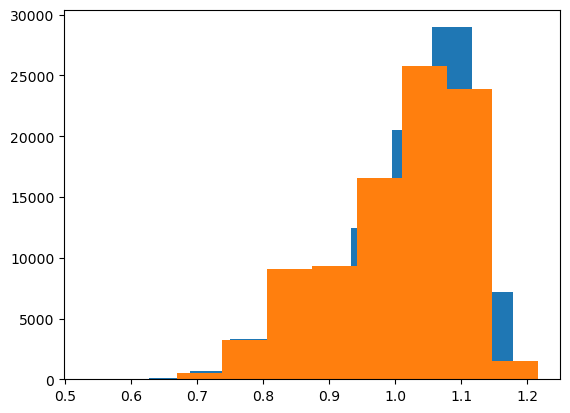

In [17]:
plt.hist(all_cout)
plt.hist(all_diaux)